<a href="https://colab.research.google.com/github/prabal5ghosh/research-project-on-physics-informed-machine-learning-on-transcriptomics-data/blob/main/neural_odes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Gene AT5G40100, Epoch 0, Loss: 5.543667316436768
Gene AT5G40100, Epoch 100, Loss: 0.00020042444521095604
Gene AT5G40100, Epoch 200, Loss: 8.128487216652047e-09
Gene AT5G40100, Epoch 300, Loss: 6.647080108557191e-10
Gene AT5G40100, Epoch 400, Loss: 7.589780366690224e-12
Gene AT5G40100, Epoch 500, Loss: 2.8140453856018155e-10
Gene AT5G40100, Epoch 600, Loss: 7.803560464481052e-09
Gene AT5G40100, Epoch 700, Loss: 2.9940871172584593e-05
Gene AT5G40100, Epoch 800, Loss: 1.994526677151498e-08
Gene AT5G40100, Epoch 900, Loss: 0.0001020735944621265


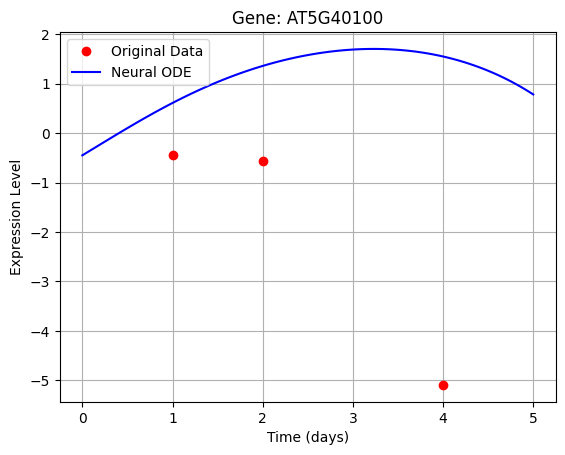

Gene AT1G06930, Epoch 0, Loss: 2.8317394256591797
Gene AT1G06930, Epoch 100, Loss: 0.0011133047519251704
Gene AT1G06930, Epoch 200, Loss: 1.1477942280180287e-05
Gene AT1G06930, Epoch 300, Loss: 1.8472519514034502e-08
Gene AT1G06930, Epoch 400, Loss: 1.0703324077737664e-12


In [ ]:
import torch
import torch.nn as nn
from torchdiffeq import odeint
import matplotlib.pyplot as plt
import numpy as np

# Dataset
time_points = torch.tensor([1.0, 2.0, 4.0])
data_values = torch.tensor([
    [-0.44796003, -0.560154646, -5.091964284],
    [1.778358524, 0, 0],
    [0, 1.175149691, 0],
    [0.055374646, 0.098434984, -0.101756864],
    [0.505, 0.505, 0.505],
])

# Neural ODE Model
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 50),
            nn.Tanh(),
            nn.Linear(50, 1),
        )

    def forward(self, t, y):
        t = t.view(-1, 1)  # Reshape time
        # Reshape y to have 2 dimensions before concatenation
        y = y.view(-1, 1)
        input = torch.cat((t, y), dim=1)  # Concatenate time and state
        return self.net(input)


# Solve and Train the Model
def train_gene(time_points, gene_data, gene_name):
    y0 = gene_data[0:1]  # Initial condition
    ode_func = ODEFunc()
    optimizer = torch.optim.Adam(ode_func.parameters(), lr=0.01)

    # Training loop
    for epoch in range(1000):
        optimizer.zero_grad()
        pred_y = odeint(ode_func, y0, time_points)
        loss = torch.mean((pred_y.squeeze() - gene_data) ** 2)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Gene {gene_name}, Epoch {epoch}, Loss: {loss.item()}")

    # Plot results
    t_test = torch.linspace(0.0, 5.0, 100)
    y_pred = odeint(ode_func, y0, t_test)
    plt.plot(time_points, gene_data, 'ro', label="Original Data")
    plt.plot(t_test.detach().numpy(), y_pred.detach().squeeze().numpy(), 'b-', label="Neural ODE")
    plt.title(f"Gene: {gene_name}")
    plt.xlabel("Time (days)")
    plt.ylabel("Expression Level")
    plt.legend()
    plt.grid()
    plt.show()

# Train Neural ODEs for each gene
for i, gene_name in enumerate(["AT5G40100", "AT1G06930", "AT1G04470", "AT5G66730", "AT2G38471"]):
    train_gene(time_points, data_values[i], gene_name)
